In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn

In [ ]:
dataset = pd.read_csv("drive/MyDrive/ANN/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
dataset.values[1,21]
dataset =dataset.drop(["Over18"], axis = 1)

In [ ]:
dataset.values[1]

array([49, 'No', 'Travel_Frequently', 279, 'Research & Development', 8, 1,
       'Life Sciences', 1, 2, 3, 'Male', 61, 2, 2, 'Research Scientist',
       2, 'Married', 5130, 24907, 1, 'No', 23, 4, 4, 80, 1, 10, 3, 3, 10,
       7, 1, 7], dtype=object)

In [ ]:
Y = dataset.iloc[:, 1].values
print(Y)
Y = np.array(Y)
type(Y)
Y.shape

['Yes' 'No' 'Yes' ... 'No' 'No' 'No']


(1470,)

In [ ]:
# Encoding gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)
print(Y[1])
print(Y[0])

[1 0 1 ... 0 0 0]
0
1


In [ ]:
X = dataset.drop(dataset.columns[1], axis =1)
X = X.values

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X[1])

[49 'Travel_Frequently' 279 'Research & Development' 8 1 'Life Sciences' 1
 2 3 'Male' 61 2 2 'Research Scientist' 2 'Married' 5130 24907 1 'No' 23 4
 4 80 1 10 3 3 10 7 1 7]


In [ ]:
# Encoding gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[: ,10] = le.fit_transform(X[:, 10])

In [ ]:
print(X[1])

[49 'Travel_Frequently' 279 'Research & Development' 8 1 'Life Sciences' 1
 2 3 1 61 2 2 'Research Scientist' 2 'Married' 5130 24907 1 'No' 23 4 4 80
 1 10 3 3 10 7 1 7]


In [ ]:
#One hot encoding business travel column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder= "passthrough")
X = np.array(ct.fit_transform(X))

In [ ]:
print(X[1])

[0.0 1.0 0.0 49 279 'Research & Development' 8 1 'Life Sciences' 1 2 3 1
 61 2 2 'Research Scientist' 2 'Married' 5130 24907 1 'No' 23 4 4 80 1 10
 3 3 10 7 1 7]


In [ ]:
print(X[1,8])

Life Sciences


In [ ]:
#One hot encoding education column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder= "passthrough")
X = np.array(ct.fit_transform(X))

In [ ]:
print(X[1])

[0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 49 279 'Research & Development' 8 1 1
 2 3 1 61 2 2 'Research Scientist' 2 'Married' 5130 24907 1 'No' 23 4 4 80
 1 10 3 3 10 7 1 7]


In [ ]:
print(X[1,11])

Research & Development


In [ ]:
#One hot encoding DEPARTMENT column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [11])], remainder= "passthrough")
X = np.array(ct.fit_transform(X))

In [ ]:
print(X[1])

[0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 49 279 8 1 1 2 3 1 61 2 2
 'Research Scientist' 2 'Married' 5130 24907 1 'No' 23 4 4 80 1 10 3 3 10
 7 1 7]


In [ ]:
print(X[1,23])

Research Scientist


In [ ]:
#One hot encoding JobRole column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [23])], remainder= "passthrough")
X = np.array(ct.fit_transform(X))

In [ ]:
print(X[1])

[0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
 0.0 1.0 0.0 49 279 8 1 1 2 3 1 61 2 2 2 'Married' 5130 24907 1 'No' 23 4
 4 80 1 10 3 3 10 7 1 7]


In [ ]:
print(X[1,33])

Married


In [ ]:
#One hot encoding Marital Status column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [33])], remainder= "passthrough")
X = np.array(ct.fit_transform(X))

In [ ]:
print(X[1])

[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0
 0.0 0.0 0.0 0.0 1.0 0.0 49 279 8 1 1 2 3 1 61 2 2 2 5130 24907 1 'No' 23
 4 4 80 1 10 3 3 10 7 1 7]


In [ ]:
print(X[1,-13])

No


In [ ]:
# Encoding overtime column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[: ,-13] = le.fit_transform(X[:, -13])

In [ ]:
print(X[1,-13])

0


In [ ]:
print(X[1])

[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0
 0.0 0.0 0.0 0.0 1.0 0.0 49 279 8 1 1 2 3 1 61 2 2 2 5130 24907 1 0 23 4 4
 80 1 10 3 3 10 7 1 7]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test) 

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 6, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

In [ ]:
ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
ann.fit(X_train, y_train, batch_size= 32, epochs = 100)

Epoch 1/100
37/37 [==============================] - 1s 3ms/step - loss: 0.6281 - accuracy: 0.7389
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7951
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.5057 - accuracy: 0.8291
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.8384
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.8427
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.8478
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8520
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 0.4023 - accuracy: 0.8546
Epoch 9/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3905 - accuracy: 0.8563
Epoch 10/100
37/37 [==============================] - 0s 3ms/step - loss: 0.3789 - accuracy: 0.8580
Epoch 11/

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [ ]:
print(" Precision Score:", sklearn.metrics.precision_score(y_test, y_pred))
print(" Recall Score :", sklearn.metrics.recall_score(y_test, y_pred))

 Precision Score: 0.625
 Recall Score : 0.5102040816326531


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[230  15]
 [ 24  25]]
0.8673469387755102


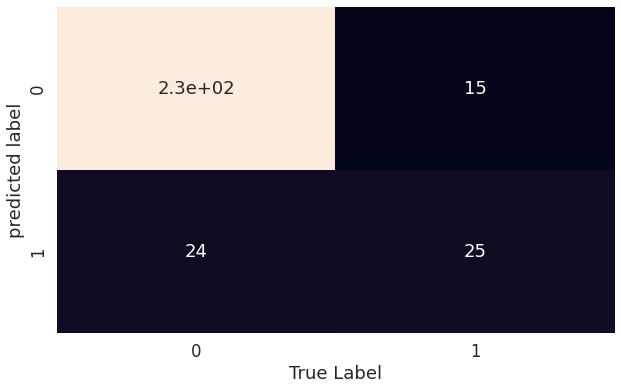

In [ ]:
sns.set(font_scale = 1.5)
def plot_confusion_matrix(y_test, y_pred):
  fig, ax = plt.subplots(figsize = (10,6))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                   annot = True,
                   cbar = False)
  plt.xlabel("True Label")
  plt.ylabel("predicted label")

plot_confusion_matrix(y_test, y_pred)

***